In [1]:
import pandas as pd
import numpy as np

import requests

In [2]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import HeatMapWithTime

import os
import sys
 
def generateBaseMap(default_location=[-9.488560, -18.826032], default_zoom_start=1):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start, tiles = "CartoDB positron")
    return base_map

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [3]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 20)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_info_columns', 20)

In [4]:
import chart_studio
import chart_studio.plotly as py

import sys
sys.path.insert(0, 'D:/Data Course/Functions')

from My_functions_EDA import *
from fx_MLRegression import *

In [5]:
teamcolor_dict = { 'N. America East': 'rgb(179, 226, 205)','N. America West': 'rgb(179, 226, 205)', 'N. America': 'rgb(179, 226, 205)',
                  'Europe': 'rgb(223, 226, 177)', 'Central/S. America': 'rgb(226, 177, 199)',  'Asia Pacific': 'rgb(180, 177, 226)'}
color_dict = { 'Yes': '#e07a5f','No': '#3d405b'}

# Import Data 

## Data Historical

- 00 - **GPA**        *Data Numerical Continuous*
- 01 - **Weigth**     *Data Numerical Continuous*
- 02 - **Rank**       *Data Numerical Discrete*  
- 03 - **Name**       *Data Categorical Nominal*
- 04 - **City_old**   *Data Categorical Nominal*
- 05 - **Region**     *Data Categorical Nominal*
- 06 - **G**          *Data Numerical Discrete*
- 07 - **Win**        *Data Numerical Discrete*
- 08 - **Los**        *Data Numerical Discrete*
- 09 - **Year**       *Data Numerical Date*
- 10 - **City**       *Data Categorical Nominal*
- 11 - **CityCode**   *Data Categorical Nominal*
- 12 - **Country**    *Data Categorical Nominal*
- 13 - **Longitude**  *Data Numerical Continuous*
- 14 - **Latitude**   *Data Numerical Continuous*

In [6]:
data_hist = pd.read_csv("../datasets/01-WFTDA-historical.csv")# Add the name of the file
data_hist.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
data_hist

GPA  \
0     484.22   
1     404.37   
2     377.71   
3     361.71   
4     334.51   
...      ...   
7732   36.70   
7733   31.05   
7734   28.24   
7735   15.91   
7736   14.48   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   350   
7733   351   
7734   352   
7735   353   
7736   354   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733     Miss_Valley   
7734  Kaiserslautern   
7735      Gothenburg   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733          LaCrosse, WI, US   
7734  Rhineland-Pfalz, Germany   
7735        Gothenburg, Sweden   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735      Europe   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   4    0   
7734   2    0   
7735   2    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    4   
7734    2   
7735    2   
7736    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-09-01   
7733  2019-09-01   
7734  2019-09-01   
7735  2019-09-01   
7736  2019-09-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733         LaCrosse   
7734  Rhineland-Pfalz   
7735       Gothenburg   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WI   
7734      NaN   
7735      NaN   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735   Sweden   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733     -91.10   
7734       7.84   
7735      11.97   
7736    -117.19   

      Latitude  
0        40.71  
1        39.74  
2        47.05  
3        37.80  
4        34.05  
...        ...  
7732     27.75  
7733     43.90  
7734     50.22  
7735     57.71  
7736     33.58  

[7737 rows x 15 columns]

In [7]:
data_hist = data_hist.sort_values(by=["Year", "Rank"]).reset_index(drop=True)

In [8]:
data_hist["GPA"] = data_hist.GPA.str.replace(",", "")
data_hist["GPA"] = data_hist.GPA.astype(float)

In [9]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GPA        7737 non-null   float64
 1   Weigth     7737 non-null   float64
 2   Rank       7737 non-null   int64  
 3   Name       7737 non-null   object 
 4   City_old   7737 non-null   object 
 5   Region     7737 non-null   object 
 6   G          7737 non-null   int64  
 7   Win        7737 non-null   int64  
 8   Los        7737 non-null   int64  
 9   Year       7737 non-null   object 
 10  City       7737 non-null   object 
 11  CityCode   6190 non-null   object 
 12  Country    7737 non-null   object 
 13  Longitude  7737 non-null   float64
 14  Latitude   7737 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 906.8+ KB


## Time Line

- 01 - **Region**     *Data Categorical Nominal*
- 02 - **Year**       *Data Numerical Date*
- 03 - **count**          *Data Numerical Discrete*


In [10]:
dfcount = pd.read_csv("../datasets/01-timeseries.csv")# Add the name of the file
dfcount.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
dfcount.columns  = ['Year', 'Region', 'count']

In [11]:
dfcount = dfcount.sort_values(by=["Year", "Region"]).reset_index(drop=True)
dfcount

Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
0          Asia Pacific   
1    Central/S. America   
2                Europe   
3       N. America East   
4       N. America West   
..                  ...   
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  
0        1  
1        0  
2       12  
3       88  
4       65  
..     ...  
130     17  
131      2  
132     71  
133    159  
134    119  

[135 rows x 3 columns]

## Arenas

- 01 - **Lat_Long**  *Data Numerical Continuous*
- 02 - **Cantidad**        *Data Numerical Continuous*
- 03 - **Longitude**  *Data Numerical Continuous*
- 04 - **Latitude**   *Data Numerical Continuous*
- 05 - **Region**     *Data Categorical Nominal*


In [12]:
arena = pd.read_csv("../datasets/01-HomeArenas.csv")# Add the name of the file
arena.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
arena

Lat_Long  \
0     40.1582, -75.0152   
1    44.0505, -123.0951   
2       48.8567, 2.3515   
3     45.4972, -73.6104   
4      60.1674, 24.9426   
..                  ...   
327   41.5538, -73.0438   
328  -41.2888, 174.7772   
329   42.5083, -89.0318   
330   40.7127, -74.0060   
331  40.4233, -104.7091   

     Cantidad  \
0          53   
1          48   
2          46   
3          44   
4          42   
..        ...   
327         1   
328         1   
329         1   
330         1   
331         1   

     Latitude  \
0       40.16   
1       44.05   
2       48.86   
3       45.50   
4       60.17   
..        ...   
327     41.55   
328    -41.29   
329     42.51   
330     40.71   
331     40.42   

     Longitude  \
0       -75.02   
1      -123.10   
2         2.35   
3       -73.61   
4        24.94   
..         ...   
327     -73.04   
328     174.78   
329     -89.03   
330     -74.01   
331    -104.71   

           Region  
0      N. America  
1      N. America  
2          Europe  
3      N. America  
4          Europe  
..            ...  
327    N. America  
328  Asia Pacific  
329    N. America  
330    N. America  
331    N. America  

[332 rows x 5 columns]

## Games

In [13]:
game = pd.read_csv("../datasets/01-Games_.csv")# Add the name of the file
game.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
game

Date  \
0     2019-02-16   
1     2019-02-16   
2     2019-02-16   
3     2019-02-16   
4     2019-02-16   
...          ...   
1795  2019-11-23   
1796  2019-11-23   
1797  2019-11-23   
1798  2019-11-23   
1799  2019-11-17   

                   H_Team  \
0     Fernie_Roller_Derby   
1              Bellingham   
2     Fernie_Roller_Derby   
3                   Gorge   
4                Roc_City   
...                   ...   
1795                Namur   
1796                Namur   
1797                Namur   
1798                Namur   
1799             Montréal   

             V_Team  \
0             Gorge   
1     Eves_Destruct   
2        Bellingham   
3     Eves_Destruct   
4       Orangeville   
...             ...   
1795          Leeds   
1796  Royal Swedish   
1797         Nantes   
1798          Namur   
1799      Rose City   

                      Tournament  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
1795           Skate_Around_Tour   
1796           Skate_Around_Tour   
1797           Skate_Around_Tour   
1798           Skate_Around_Tour   
1799  International_WFTDA_Champs   

         WFTDA_H  \
0         Fernie   
1     Bellingham   
2         Fernie   
3          Gorge   
4       Roc_City   
...          ...   
1795       Namur   
1796       Namur   
1797       Namur   
1798       Namur   
1799    Montréal   

            WFTDA_V  \
0             Gorge   
1     Eves_Destruct   
2        Bellingham   
3     Eves_Destruct   
4       Orangeville   
...             ...   
1795          Leeds   
1796  Royal_Swedish   
1797         Nantes   
1798          Namur   
1799      Rose_City   

                 City_Home  \
0       Fernie, BC, Canada   
1       Bellingham, WA, US   
2       Fernie, BC, Canada   
3       Hood River, OR, US   
4        Rochester, NY, US   
...                    ...   
1795        Namur, Belgium   
1796        Namur, Belgium   
1797        Namur, Belgium   
1798        Namur, Belgium   
1799  Montreal, QC, Canada   

     Region_Home  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
1795      Europe   
1796      Europe   
1797      Europe   
1798      Europe   
1799  N. America   

      Longitude_Home  \
0            -115.06   
1            -122.48   
2            -115.06   
3            -121.51   
4             -77.62   
...              ...   
1795            4.87   
1796            4.87   
1797            4.87   
1798            4.87   
1799          -73.61   

      Latitude_Home  \
0             49.50   
1             48.75   
2             49.50   
3             45.71   
4             43.16   
...             ...   
1795          50.47   
1796          50.47   
1797          50.47   
1798          50.47   
1799          45.50   

      ...  \
0     ...   
1     ...   
2     ...   
3     ...   
4     ...   
...   ...   
1795  ...   
1796  ...   
1797  ...   
1798  ...   
1799  ...   

      Latitude_Visi  \
0             45.71   
1             48.43   
2             48.75   
3             48.43   
4             43.92   
...             ...   
1795          53.80   
1796          59.33   
1797          47.22   
1798          50.47   
1799          45.52   

     Ranked_V  \
0           1   
1           1   
2           1   
3           1   
4           0   
...       ...   
1795        1   
1796        1   
1797        1   
1798        1   
1799        1   

                    Dates  \
0                     NaN   
1                     NaN   
2                     NaN   
3                     NaN   
4                     NaN   
...                   ...   
1795  11/23/19 - 11/24/19   
1796  11/23/19 - 11/24/19   
1797  11/23/19 - 11/24/19   
1798  11/23/19 - 11/24/19   
1799  11/15/19 - 11/17/19   

             Class  \
0              N

In [14]:
game = game.sort_values(by=["Date", "Tournament"]).reset_index(drop=True)

In [15]:
game.drop(columns=['Ranked_H','Ranked_V', "H_Team", "V_Team"], axis=1, inplace=True)

In [16]:
game.loc[(game.City_Home == "South Australia"), "Region_Home"] = 'Asia Pacific'

In [17]:
game = game

In [18]:
game.loc[(game.WFTDA_H == "Rainy_City") & (game.City_Home == "Centralia, WA, US") , "WFTDA_H"] = "Rainy_City_Roller_Dolls"
game.loc[(game.WFTDA_V == "Rainy_City") & (game.City_Visi == "Centralia, WA, US") , "WFTDA_V"] = "Rainy_City_Roller_Dolls"


In [19]:
game = game.loc[game.WFTDA_V != game.WFTDA_H ,:]

# DATAHIST

- 00 - **GPA**        *Data Numerical Continuous*
- 01 - **Weigth**     *Data Numerical Continuous*
- 02 - **Rank**       *Data Numerical Discrete*  
- 03 - **Name**       *Data Categorical Nominal*
- 04 - **City_old**   *Data Categorical Nominal*
- 05 - **Region**     *Data Categorical Nominal*
- 06 - **G**          *Data Numerical Discrete*
- 07 - **Win**        *Data Numerical Discrete*
- 08 - **Los**        *Data Numerical Discrete*
- 09 - **Year**       *Data Numerical Date*
- 10 - **City**       *Data Categorical Nominal*
- 11 - **CityCode**   *Data Categorical Nominal*
- 12 - **Country**    *Data Categorical Nominal*
- 13 - **Longitude**  *Data Numerical Continuous*
- 14 - **Latitude**   *Data Numerical Continuous*

In [20]:
data_hist.describe().T

count  \
GPA       7737.00   
Weigth    7737.00   
Rank      7737.00   
G         7737.00   
Win       7737.00   
Los       7737.00   
Longitude 7737.00   
Latitude  7737.00   

            mean  \
GPA       201.92   
Weigth      1.48   
Rank      151.11   
G           7.42   
Win         3.73   
Los         3.69   
Longitude -68.68   
Latitude   37.83   

             std  \
GPA       174.42   
Weigth      1.24   
Rank       93.34   
G           3.95   
Win         2.99   
Los         2.38   
Longitude  60.46   
Latitude   17.03   

              min  \
GPA          4.89   
Weigth       0.50   
Rank         1.00   
G            2.00   
Win          0.00   
Los          0.00   
Longitude -159.56   
Latitude   -45.87   

             25%  \
GPA        94.47   
Weigth      0.69   
Rank       72.00   
G           4.00   
Win         1.00   
Los         2.00   
Longitude -97.34   
Latitude   35.47   

             50%  \
GPA       138.12   
Weigth      1.02   
Rank      144.00   
G           7.00   
Win         3.00   
Los         3.00   
Longitude -83.92   
Latitude   40.27   

             75%  \
GPA       248.48   
Weigth      1.80   
Rank      223.00   
G          10.00   
Win         5.00   
Los         5.00   
Longitude -74.01   
Latitude   44.26   

              max  
GPA       1540.36  
Weigth      10.68  
Rank       368.00  
G           25.00  
Win         19.00  
Los         19.00  
Longitude  176.99  
Latitude    64.84

In [21]:
# I do a function to see the value count of each column
def allthevalues(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts())
        print("_______________________________________")

In [22]:
allthevalues(data_hist)

GPA
68.65     6
73.42     6
76.56     6
70.79     5
69.87     5
         ..
86.24     1
149.22    1
339.45    1
77.28     1
183.59    1
Name: GPA, Length: 5934, dtype: int64
_______________________________________
Weigth
0.50    831
0.78     82
0.61     81
0.74     77
0.73     75
       ... 
5.79      1
8.05      1
7.82      1
4.03      1
7.88      1
Name: Weigth, Length: 574, dtype: int64
_______________________________________
Rank
4      27
166    27
38     27
34     27
30     27
       ..
363     1
362     1
366     1
359     1
365     1
Name: Rank, Length: 368, dtype: int64
_______________________________________
Name
Des_Moines     28
Bellingham     27
River_City     27
Dominion       27
Hammer_City    27
               ..
Choice_City     1
Iceland         1
B.M.O.          1
Faultline       1
Bordeaux        1
Name: Name, Length: 453, dtype: int64
_______________________________________
City_old
Dallas, TX, US               54
Indianapolis, IN, US         54
Chicago, IL, US     

In [23]:
data_hist["Fundation"]= data_hist.Name.apply(lambda x: data_hist.loc[(data_hist.Name == x), "Year"].min())

In [24]:
data_hist["Fund_Year"]= data_hist.Fundation.apply(lambda x: x[0:4])

In [25]:
df = data_hist.loc[(data_hist.Year == "2019-12-01"), :]
df.Fundation.nunique()

27

In [26]:
data_hist

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735  N. America   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   3    0   
7734   2    0   
7735   4    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    3   
7734    2   
7735    4   
7736    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2018-06-01   
7733  2016-03-01   
7734  2015-03-01   
7735  2014-09-01   
7736  2019-09-01   

     Fund_Year  
0         2013  
1         2013  
2         2013  
3         2013  
4         2013  
...        ...  
7732      2018  
7733      2016  
7734      2015  
7735      2014  
7736      2019  

[7737 rows x 17 columns]

In [27]:
data= data_hist.copy()
di = { 'N. America East': 1 ,'N. America West': 2, 'N. America': 6,
                  'Europe': 3, 'Central/S. America': 4,  'Asia Pacific': 5}


In [28]:
data["Region"].replace(di, inplace=True)
data

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

      Region   G  \
0          6  16   
1          6  15   
2          6  11   
3          6  14   
4          6  17   
...      ...  ..   
7732       6   2   
7733       6   3   
7734       3   2   
7735       6   4   
7736       6   2   

      Win  Los  \
0      16    0   
1      12    3   
2      10    1   
3      11    3   
4      13    4   
...   ...  ...   
7732    0    2   
7733    0    3   
7734    0    2   
7735    0    4   
7736    0    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2018-06-01   
7733  2016-03-01   
7734  2015-03-01   
7735  2014-09-01   
7736  2019-09-01   

     Fund_Year  
0         2013  
1         2013  
2         2013  
3         2013  
4         2013  
...        ...  
7732      2018  
7733      2016  
7734      2015  
7735      2014  
7736      2019  

[7737 rows x 17 columns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GPA        7737 non-null   float64
 1   Weigth     7737 non-null   float64
 2   Rank       7737 non-null   int64  
 3   Name       7737 non-null   object 
 4   City_old   7737 non-null   object 
 5   Region     7737 non-null   int64  
 6   G          7737 non-null   int64  
 7   Win        7737 non-null   int64  
 8   Los        7737 non-null   int64  
 9   Year       7737 non-null   object 
 10  City       7737 non-null   object 
 11  CityCode   6190 non-null   object 
 12  Country    7737 non-null   object 
 13  Longitude  7737 non-null   float64
 14  Latitude   7737 non-null   float64
 15  Fundation  7737 non-null   object 
 16  Fund_Year  7737 non-null   object 
dtypes: float64(4), int64(5), object(8)
memory usage: 1.0+ MB


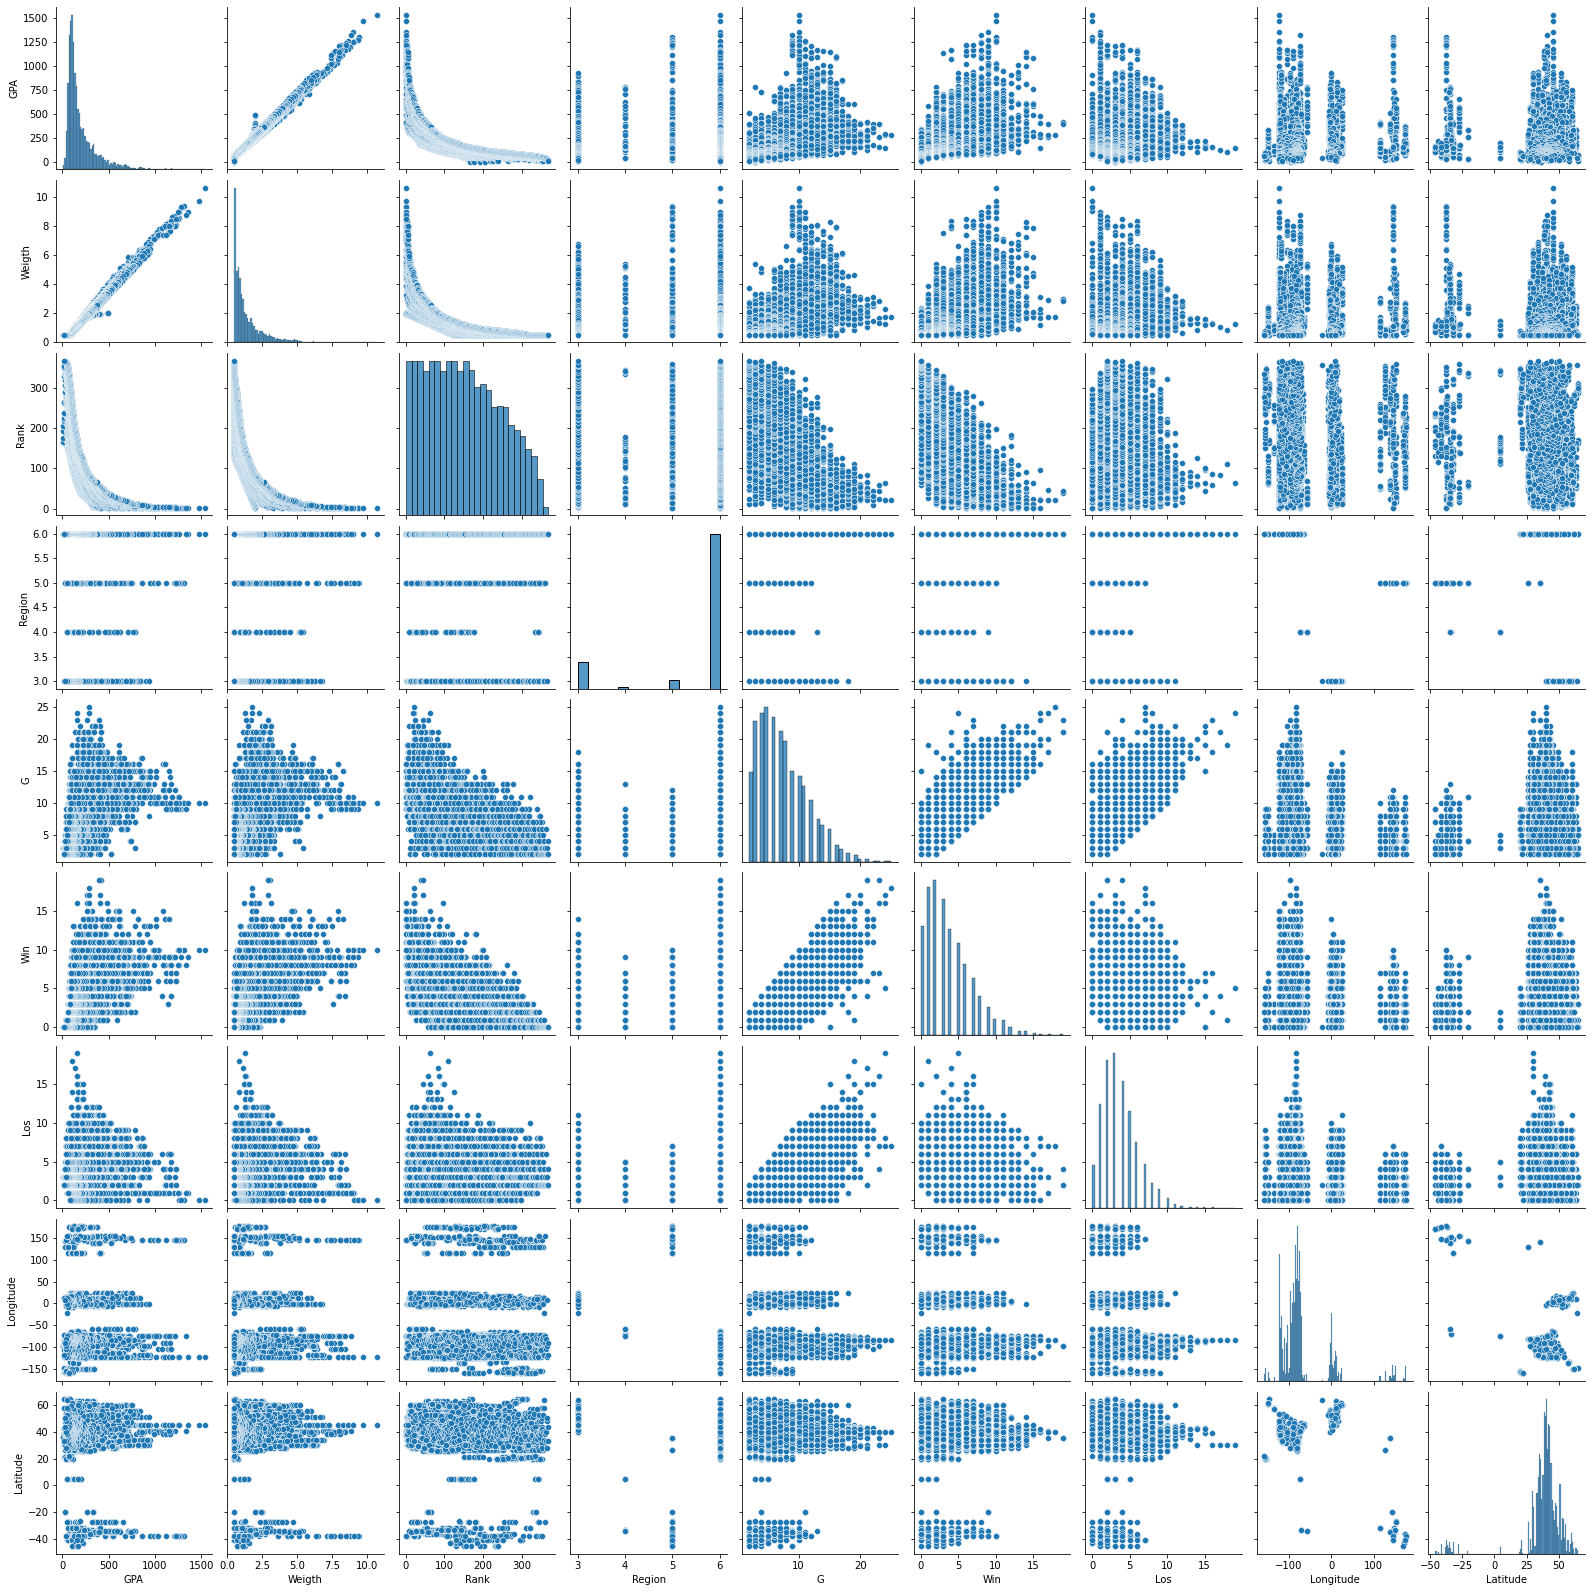

In [30]:
fig = sns.pairplot(data)
fig

In [32]:
fig.savefig("../Fig/03-Race_Country.png")

In [33]:
data

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

      Region   G  \
0          6  16   
1          6  15   
2          6  11   
3          6  14   
4          6  17   
...      ...  ..   
7732       6   2   
7733       6   3   
7734       3   2   
7735       6   4   
7736       6   2   

      Win  Los  \
0      16    0   
1      12    3   
2      10    1   
3      11    3   
4      13    4   
...   ...  ...   
7732    0    2   
7733    0    3   
7734    0    2   
7735    0    4   
7736    0    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2018-06-01   
7733  2016-03-01   
7734  2015-03-01   
7735  2014-09-01   
7736  2019-09-01   

     Fund_Year  
0         2013  
1         2013  
2         2013  
3         2013  
4         2013  
...        ...  
7732      2018  
7733      2016  
7734      2015  
7735      2014  
7736      2019  

[7737 rows x 17 columns]

## City 

In [39]:
data["City"].value_counts()

London           74
Birmingham       68
Melbourne        64
Chicago          54
Denver           54
                 ..
Best              1
Bordeaux          1
Baja              1
Nampa             1
Hafnarfjörður     1
Name: City, Length: 398, dtype: int64

In [40]:
# I have a few cities repeat a lot more than the most frecuent in City_old column 
#Denver, CO, US (54) vs London (74) / Birmingham (68) / Melbourne (64)

print(data_hist.loc[(data_hist.City == "London"), "City_old"].unique())
print(data_hist.loc[(data_hist.City == "Birmingham"), "City_old"].unique())
print(data_hist.loc[(data_hist.City == "Melbourne"), "City_old"].unique())

['London, England' 'London, ON, Canada']
['Birmingham, England' 'Birmingham, AL, US']
['Melbourne, VIC, Australia' 'Melbourne, FL, US']


In [41]:
city = data_hist.groupby(['City_old', 'Region', 'Year']).count().sort_values(by=((["Year"])), ascending=False).reset_index()
city

City_old  \
0        Zurich, Switzerland   
1            Hammond, IN, US   
2         Pittsburgh, PA, US   
3             Athens, GA, US   
4     Hazlet, New Jersey, US   
...                      ...   
7204           Ogden, UT, US   
7205           Boise, ID, US   
7206       Glasgow, Scotland   
7207     Baton Rouge, LA, US   
7208       Centralia, WA, US   

          Region  \
0         Europe   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7204  N. America   
7205  N. America   
7206      Europe   
7207  N. America   
7208  N. America   

            Year  \
0     2019-12-01   
1     2019-12-01   
2     2019-12-01   
3     2019-12-01   
4     2019-12-01   
...          ...   
7204  2013-06-01   
7205  2013-06-01   
7206  2013-06-01   
7207  2013-06-01   
7208  2013-06-01   

      GPA  Weigth  \
0       1       1   
1       1       1   
2       1       1   
3       1       1   
4       1       1   
...   ...     ...   
7204    1       1   
7205    1       1   
7206    1       1   
7207    1       1   
7208    1       1   

      Rank  Name  \
0        1     1   
1        1     1   
2        1     1   
3        1     1   
4        1     1   
...    ...   ...   
7204     1     1   
7205     1     1   
7206     1     1   
7207     1     1   
7208     1     1   

      G  Win  Los  \
0     1    1    1   
1     1    1    1   
2     1    1    1   
3     1    1    1   
4     1    1    1   
...  ..  ...  ...   
7204  1    1    1   
7205  1    1    1   
7206  1    1    1   
7207  1    1    1   
7208  1    1    1   

      City  \
0        1   
1        1   
2        1   
3        1   
4        1   
...    ...   
7204     1   
7205     1   
7206     1   
7207     1   
7208     1   

      CityCode  \
0            0   
1            1   
2            1   
3            1   
4            0   
...        ...   
7204         1   
7205         1   
7206         0   
7207         1   
7208         1   

      Country  \
0           1   
1           1   
2           1   
3           1   
4           1   
...       ...   
7204        1   
7205        1   
7206        1   
7207        1   
7208        1   

      Longitude  \
0             1   
1             1   
2             1   
3             1   
4             1   
...         ...   
7204          1   
7205          1   
7206          1   
7207          1   
7208          1   

      Latitude  \
0            1   
1            1   
2            1   
3            1   
4            1   
...        ...   
7204         1   
7205         1   
7206         1   
7207         1   
7208         1   

      Fundation  \
0             1   
1             1   
2             1   
3             1   
4             1   
...         ...   
7204          1   
7205          1   
7206          1   
7207          1   
7208          1   

      Fund_Year  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
7204          1  
7205          1  
7206          1  
7207          1  
7208          1  

[7209 rows x 17 columns]

In [42]:
city.loc[(city.GPA > 1), "City_old"].unique()

array(['Helsinki, Finland', 'Indianapolis, IN, US', 'Houston, TX, US',
       'Paris, France', 'Philadelphia, PA, US', 'San Diego, CA, US',
       'Richmond, VA, US', 'Gothenburg, Sweden',
       'Melbourne, VIC, Australia', 'London, England', 'Chicago, IL, US',
       'Toronto, ON, Canada', 'Denver, CO, US', 'Columbia, SC, US',
       'Ventura, CA, US', 'Dallas, TX, US', 'Birmingham, England',
       'St. Louis, MO, US', 'Buenos Aires, Argentina',
       'Stockholm, Sweden', 'Vancouver, BC, Canada', 'Morristown, NJ, US',
       'San Jose, CA, US', 'Seattle, WA, US', 'Bakersfield, CA, US',
       'Okinawa, Japan', 'Auckland, New Zealand', 'Ottawa, ON, Canada',
       'Sacramento, CA, US', 'Oklahoma City, OK, US', 'Beckley, WV, US',
       'Des Moines, IA, US', 'Appleton, WI, US', 'Fort Collins, CO, US'],
      dtype=object)

In [43]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == "2019-12-01")), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Dec/2019-',
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()


In [44]:
fig.write_image("../Fig/Citys_Dec-2019.png")


In [45]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == "2016-09-01")), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Sep/2016-', 
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()


In [46]:
fig.write_image("../Fig/Citys_Sep-2016.png")


In [47]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == city.Year.min())), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Jun/2013-', 
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()

In [48]:
fig.write_image("../Fig/Citys_Jun-2013.png")


## Country

In [49]:
country = data_hist.groupby(['Country', 'Region', 'Year']).count().sort_values(by=(["Year", "GPA"]), ascending=False).reset_index()
country

Country  \
0               USA   
1            Canada   
2    United Kingdom   
3         Australia   
4            France   
..              ...   
482          Sweden   
483       Australia   
484         Belgium   
485         Finland   
486         Germany   

           Region  \
0      N. America   
1      N. America   
2          Europe   
3    Asia Pacific   
4          Europe   
..            ...   
482        Europe   
483  Asia Pacific   
484        Europe   
485        Europe   
486        Europe   

           Year  \
0    2019-12-01   
1    2019-12-01   
2    2019-12-01   
3    2019-12-01   
4    2019-12-01   
..          ...   
482  2013-06-01   
483  2013-06-01   
484  2013-06-01   
485  2013-06-01   
486  2013-06-01   

     GPA  Weigth  \
0    254     254   
1     23      23   
2     19      19   
3     11      11   
4     11      11   
..   ...     ...   
482    2       2   
483    1       1   
484    1       1   
485    1       1   
486    1       1   

     Rank  Name  \
0     254   254   
1      23    23   
2      19    19   
3      11    11   
4      11    11   
..    ...   ...   
482     2     2   
483     1     1   
484     1     1   
485     1     1   
486     1     1   

     City_old  \
0         254   
1          23   
2          19   
3          11   
4          11   
..        ...   
482         2   
483         1   
484         1   
485         1   
486         1   

       G  Win  \
0    254  254   
1     23   23   
2     19   19   
3     11   11   
4     11   11   
..   ...  ...   
482    2    2   
483    1    1   
484    1    1   
485    1    1   
486    1    1   

     Los  City  \
0    254   254   
1     23    23   
2     19    19   
3     11    11   
4     11    11   
..   ...   ...   
482    2     2   
483    1     1   
484    1     1   
485    1     1   
486    1     1   

     CityCode  \
0         245   
1          22   
2           0   
3           2   
4           0   
..        ...   
482         0   
483         0   
484         0   
485         0   
486         0   

     Longitude  \
0          254   
1           23   
2           19   
3           11   
4           11   
..         ...   
482          2   
483          1   
484          1   
485          1   
486          1   

     Latitude  \
0         254   
1          23   
2          19   
3          11   
4          11   
..        ...   
482         2   
483         1   
484         1   
485         1   
486         1   

     Fundation  \
0          254   
1           23   
2           19   
3           11   
4           11   
..         ...   
482          2   
483          1   
484          1   
485          1   
486          1   

     Fund_Year  
0          254  
1           23  
2           19  
3           11  
4           11  
..         ...  
482          2  
483          1  
484          1  
485          1  
486          1  

[487 rows x 17 columns]

In [50]:
print(country.loc[(country.GPA < 3) & (country.Year == "2019-12-01"), "Country"].nunique())

11


In [51]:
fig = px.bar(country, x= 'Country', y='GPA', color="Region", animation_frame="Year", 
             range_x=([0, 16]),
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Countries with 2 or more Teams',
             labels={'GPA':'The Countries'}).update_xaxes(categoryorder="sum descending")
fig.show()

In [52]:
fig.write_html("../Fig/03-Race_Country.html")

In [53]:
fig = px.treemap(country[country.Year == "2019-12-01"], path=[px.Constant('Region'), 'City_old', 'Country'], values='GPA',
                  color='Region')

fig.show()


In [54]:
fig = px.sunburst(country[country.Year == "2019-12-01"], path=['Region', 'Country'], values='GPA',
                  color='Region')
fig.show()

### Map Country evolution

In [55]:
data_hist["count"]= 1
df_month_list = []
for year in data_hist.Year.sort_values().unique():
    df_month_list.append(data_hist.loc[data_hist.Year == year, ['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    

mapa_hist = generateBaseMap(default_zoom_start=2)
HeatMapWithTime(df_month_list, radius=10, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(mapa_hist)
mapa_hist

In [56]:
mapa_hist.save("../Fig/02-HIST_TEAM.html")

## Fundation

In [57]:
df= data_hist.groupby(['Name','Country', 'Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()
df = df.loc[(df.Fundation != "2013-06-01"),:]


In [58]:
fund_country = df.groupby(['Country', 'Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()

fund_region = df.groupby(['Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()

fund_region_year = df.groupby(['Region', "Fund_Year"]).count().sort_values(by=(["Fund_Year", "GPA"]), ascending=False).reset_index()

fund_country_year = df.groupby(['Country', 'Region', "Fund_Year"]).count().sort_values(by=(["Fund_Year", "GPA"]), ascending=False).reset_index()


In [59]:
df.loc[((df.Region == "Central/S. America")),:]

Name  \
94   Sailor_City   
99   Metro_Chile   
100       Bogotá   
116        2_x_4   
251   RnR_Queens   

       Country  \
94   Argentina   
99       Chile   
100   Colombia   
116  Argentina   
251   Colombia   

                 Region  \
94   Central/S. America   
99   Central/S. America   
100  Central/S. America   
116  Central/S. America   
251  Central/S. America   

      Fundation  \
94   2017-06-01   
99   2017-06-01   
100  2017-06-01   
116  2016-09-01   
251  2014-06-01   

    Fund_Year  \
94       2017   
99       2017   
100      2017   
116      2016   
251      2014   

     GPA  Weigth  \
94    11      11   
99     6       6   
100    4       4   
116   14      14   
251   20      20   

     Rank  \
94     11   
99      6   
100     4   
116    14   
251    20   

     City_old   G  \
94         11  11   
99          6   6   
100         4   4   
116        14  14   
251        20  20   

     Win  Los  \
94    11   11   
99     6    6   
100    4    4   
116   14   14   
251   20   20   

     Year  City  \
94     11    11   
99      6     6   
100     4     4   
116    14    14   
251    20    20   

     CityCode  \
94          0   
99          0   
100         0   
116         0   
251         0   

     Longitude  \
94          11   
99           6   
100          4   
116         14   
251         20   

     Latitude  \
94         11   
99          6   
100         4   
116        14   
251        20   

     count  
94      11  
99       6  
100      4  
116     14  
251     20

### Bar and Line plot Trim with Country

In [60]:
fund = df.groupby(['Region', 'Fundation']).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()
fund

i = ["2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-09-01","2017-03-01", 
     "2016-12-01","2016-03-01",
     "2015-09-01",
     "2014-09-01", "2014-03-01",
     "2013-12-01","2013-09-01"]
a = fund.copy()

for x in i:
    df2 = pd.DataFrame([["Asia Pacific",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a]) 


In [61]:
fund.loc[fund.Region.str.contains("Asia Pacific"), "Fundation"].unique()

array(['2019-12-01', '2017-12-01', '2017-06-01', '2016-09-01',
       '2016-06-01', '2015-12-01', '2015-06-01', '2015-03-01',
       '2014-12-01', '2014-06-01'], dtype=object)

In [62]:
i = ["2018-09-01", "2018-03-01","2015-09-01","2013-09-01"]
for x in i:
    df2 = pd.DataFrame([["Europe",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a]) 

In [63]:
i = ["2019-12-01","2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-12-01","2017-09-01","2017-03-01", 
     "2016-12-01","2016-06-01","2016-03-01",
     "2015-12-01","2015-09-01","2015-06-01","2015-03-01",
     "2014-12-01","2014-09-01","2014-03-01",
     "2013-12-01","2013-09-01","2013-06-01"]
for x in i:
    df2 = pd.DataFrame([["Central/S. America",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a                  ]) 


In [64]:
a = a.sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index(drop=True)
a = a.iloc[:,0:3]
a["Fund_Year"]= a.Fundation.apply(lambda x: x[0:4])


In [65]:
fig = px.line(a.loc[(a.Fundation != "2013-06-01"), : ], x= 'Fundation', y='GPA', color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Amount of new members',
              labels={'GPA':'Count', 'Fundation': 'New Members'})
fig.update_traces(mode='lines+markers')
fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="12/2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="02/2018 RD World Cup <br>(Manchester)")

fig.update_traces(line_width=3)

fig.show()

In [66]:
fig.write_image("../Fig/04-new_members.png")

In [67]:
fig = px.bar(fund_country, x= 'Fundation', y='GPA', color="Region", barmode='stack',
             template="plotly_white", color_discrete_map=teamcolor_dict, title='New members by trimestre', 
             labels={'GPA':'Count'}, hover_data = ['Country'])
fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="12/2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="02/2018 RD World Cup <br>(Manchester)")
  

fig.show()

In [68]:
fig.write_html("../Fig/05-new_members_detail.html")

In [69]:
fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Europe")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Europe")), 'GPA' ],
    mode="markers+lines", name="Europe", line=dict(color="rgb(223, 226, 177)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "N. America")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "N. America")), 'GPA' ],
    mode="markers+lines", name="N. America", line=dict(color="rgb(179, 226, 205)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Central/S. America")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Central/S. America")), 'GPA' ],
    mode="markers+lines", name="Central/S. America", line=dict(color="rgb(226, 177, 199)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Asia Pacific")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Asia Pacific")), 'GPA' ],
    mode="markers+lines", name="Asia Pacific", line=dict(color="rgb(180, 177, 226)")
))
             
          
    





In [70]:
fig.write_html("../Fig/05-new_members_more-detail.html")

### Bar plot Year 

In [71]:
fig = px.bar(fund_country_year, x= 'Fund_Year', y='GPA', color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='New members by year',
              labels={'GPA':'Count'}, hover_data=[ 'Country'])

scatter_total = fund_country_year.iloc[:,0:4].groupby("Fund_Year").sum().reset_index()
scatter_total.columns = ["Year_Key", "Total"]
fund_country_year = pd.merge(fund_country_year, scatter_total , how="inner", left_on="Fund_Year", right_on="Year_Key")

fig.add_trace(go.Scatter(
        x=scatter_total["Year_Key"],
        y=scatter_total["Total"],
        mode="markers+lines",
        name="Total",
        line=dict(
            color="black"
        )
    ))

fig.show()


In [72]:
fig.write_html("../Fig/06-new_members-year.html")

In [73]:
aa = fund_country.loc[(fund_country.Country != "USA"), :]

coso = px.bar(aa, x= 'Fundation', y='GPA', barmode='stack',
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Amount of new members',
              )
coso.show()

In [74]:
coso.write_image("../Fig/04-new_members_withoutUSA.png")

In [75]:
aa.Fundation.value_counts()

2017-06-01    11
2016-06-01     7
2015-06-01     7
2016-09-01     5
2019-12-01     5
2019-06-01     5
2014-06-01     5
2017-09-01     5
2014-12-01     4
2016-12-01     4
2018-06-01     4
2015-12-01     3
2016-03-01     3
2015-03-01     3
2017-12-01     3
2017-03-01     2
2014-09-01     2
2019-09-01     2
2014-03-01     2
2019-03-01     1
2018-09-01     1
2018-12-01     1
2013-12-01     1
Name: Fundation, dtype: int64

### Map of the year of fundation

In [76]:
mappin = {'2013-06-01' : 90, '2013-09-01' : 90 ,'2013-12-01' : 90,
         '2014-03-01' : 75, '2014-06-01' : 75, '2014-09-01' : 75 , '2014-12-01' : 75 ,
         '2015-03-01' : 60, '2015-06-01' : 60, '2015-09-01' : 60, '2015-12-01' : 60,
         '2016-03-01' : 45, '2016-06-01' : 45, '2016-09-01' : 45, '2016-12-01' : 45, 
         '2017-03-01' : 30, '2017-06-01' : 30, '2017-09-01' : 30, '2017-12-01' : 30,
         '2018-03-01' : 15 ,'2018-06-01' : 15, '2018-09-01' : 15,  '2018-12-01' : 15,
         '2019-03-01' : 1, '2019-06-01' : 1, '2019-09-01' : 1, '2019-12-01' : 1   
         }
df['Size'] = df['Fundation'].map(mappin) 

In [77]:
# Create base map
mapa1 = folium.Map(location = [-9.488560, -18.826032],
                 zoom_start = 1.5, 
                 tiles = "CartoDB positron") # Sets Tile Theme to (Dark Theme)

mc = MarkerCluster()
for index, row in df.iterrows():
    mc.add_child(folium.Marker(location=[str(row['Latitude']),     str(row['Longitude'])], tooltip= str(row['Name'] + " in the ranking since  "+ row['Fundation']),
                               icon=folium.Icon(color="darkpurple", icon="star",      clustered_marker=True)))
    folium.Circle(location=[str(row['Latitude']), str(row['Longitude'])], color='pink', fill=False,  radius=int(row['Size'])*900).add_to(mapa1)
mapa1.add_child(mc)
mapa1.save('../Fig/foundation_map.html') # Saves Map to an HTML File

##  Rank

In [78]:
rank = data_hist.loc[(data_hist.Rank < 51), :].sort_values(by=(["Year", "Weigth"]), ascending=True).reset_index(drop= True)
rank

GPA  \
0     171.80   
1     177.68   
2     179.15   
3     181.00   
4     181.51   
...      ...   
1345 1154.97   
1346 1158.81   
1347 1171.56   
1348 1228.65   
1349 1540.36   

      Weigth  \
0       1.40   
1       1.41   
2       1.42   
3       1.43   
4       1.45   
...      ...   
1345    8.01   
1346    8.04   
1347    8.13   
1348    8.52   
1349   10.68   

      Rank  \
0       50   
1       49   
2       48   
3       47   
4       46   
...    ...   
1345     5   
1346     4   
1347     3   
1348     2   
1349     1   

            Name  \
0       Carolina   
1             DC   
2     Blue_Ridge   
3       Mid_Iowa   
4      Kalamazoo   
...          ...   
1345      Gotham   
1346  Arch_Rival   
1347      Denver   
1348    Victoria   
1349   Rose_City   

                       City_old  \
0               Raleigh, NC, US   
1            Washington, DC, US   
2             Asheville, NC, US   
3            Des Moines, IA, US   
4             Kalamazoo, MI, US   
...                         ...   
1345      New York City, NY, US   
1346          St. Louis, MO, US   
1347             Denver, CO, US   
1348  Melbourne, VIC, Australia   
1349           Portland, OR, US   

            Region  \
0       N. America   
1       N. America   
2       N. America   
3       N. America   
4       N. America   
...            ...   
1345    N. America   
1346    N. America   
1347    N. America   
1348  Asia Pacific   
1349    N. America   

       G  Win  \
0     13    3   
1     19    7   
2     14    6   
3      2    2   
4     18   11   
...   ..  ...   
1345  12    9   
1346  10    6   
1347  13    8   
1348  10    6   
1349  10   10   

      Los  \
0      10   
1      12   
2       8   
3       0   
4       7   
...   ...   
1345    3   
1346    4   
1347    5   
1348    4   
1349    0   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
1345  2019-12-01   
1346  2019-12-01   
1347  2019-12-01   
1348  2019-12-01   
1349  2019-12-01   

               City  \
0           Raleigh   
1        Washington   
2         Asheville   
3        Des Moines   
4         Kalamazoo   
...             ...   
1345  New York City   
1346      St. Louis   
1347         Denver   
1348      Melbourne   
1349       Portland   

     CityCode  \
0          NC   
1          DC   
2          NC   
3          IA   
4          MI   
...       ...   
1345       NY   
1346       MO   
1347       CO   
1348      NaN   
1349       OR   

        Country  \
0           USA   
1           USA   
2           USA   
3           USA   
4           USA   
...         ...   
1345        USA   
1346        USA   
1347        USA   
1348  Australia   
1349        USA   

      Longitude  \
0        -78.64   
1        -77.04   
2        -82.55   
3        -93.60   
4        -85.59   
...         ...   
1345     -74.01   
1346     -90.24   
1347    -104.98   
1348     144.96   
1349    -122.67   

      Latitude  \
0        35.78   
1        38.89   
2        35.60   
3        41.59   
4        42.29   
...        ...   
1345     40.71   
1346     38.65   
1347     39.74   
1348    -37.81   
1349     45.52   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
1345  2013-06-01   
1346  2013-06-01   
1347  2013-06-01   
1348  2013-06-01   
1349  2013-06-01   

     Fund_Year  \
0         2013   
1         2013   
2         2013   
3         2013   
4         2013   
...        ...   
1345      2013   
1346      2013   
1347      2013   
1348      2013   
1349      2013   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
1345      1  
1346      1  
1347      1  
1348      1  
1349      1  

[1350 rows x 18 columns]

In [79]:
aba = rank.loc[rank.Rank <26, :]
aba = aba.groupby(['Year', 'Region', ]).count().sort_values(by=(["Year"]), ascending=False).reset_index()
aba
dic = []
for i in aba.index:
    a = aba.iloc[i, 2]*100/25
    dic.append("{:.2f}".format(a))
dic

aba["Percentage"] = dic

fig = px.bar(aba, x="Year", y="GPA",color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Teams in the top 25',
              labels={'GPA':'Count'}, hover_data= ['Percentage'],text=aba['GPA'])




fig.show()


In [80]:
fig.write_image("../Fig/08-Top25.png")

In [81]:
i = ["2019-12-01","2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-12-01","2017-09-01","2017-06-01","2017-03-01",
     "2016-12-01","2016-09-01","2016-06-01","2016-03-01",
     "2015-12-01","2015-09-01","2015-06-01","2015-03-01",
     "2014-12-01","2014-09-01","2014-06-01","2014-03-01",
     "2013-12-01","2013-09-01","2013-06-01"]
for x in i:
    df2 = pd.DataFrame([["Central/S. America",51,0, x]], columns=['Region','Rank','GPA', 'Year'])
    rank = pd.concat([df2, rank]) 

In [82]:
data_hist = data_hist.sort_values(by=(["Year", "Weigth"]), ascending=True).reset_index(drop= True)

In [83]:
fig = px.bar(rank,
             y="Rank",
             x="GPA",
             animation_frame="Year",
             orientation='h',
             range_x=([0, data_hist.GPA.max()]),
             text  = "Name",
             color="Region", 
             color_discrete_map=teamcolor_dict)
# improve aesthetics (size, grids etc.)
fig.update_layout(width=1000,
                  height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_text='Evolution of Ranking by Region',
                  showlegend=True)
#fig.update_layout(transition={'duration': 3000, 'easing': 'cubic-in-out'})

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='RANK')
fig.show()


In [84]:
fig.write_html("../Fig/10-Race_Rank.html")

In [85]:
data_hist

GPA  \
0      85.61   
1      85.23   
2      84.66   
3      83.05   
4      82.56   
...      ...   
7732 1154.97   
7733 1158.81   
7734 1171.56   
7735 1228.65   
7736 1540.36   

      Weigth  \
0       0.50   
1       0.50   
2       0.50   
3       0.50   
4       0.50   
...      ...   
7732    8.01   
7733    8.04   
7734    8.13   
7735    8.52   
7736   10.68   

      Rank  \
0      125   
1      126   
2      127   
3      128   
4      129   
...    ...   
7732     5   
7733     4   
7734     3   
7735     2   
7736     1   

               Name  \
0        Ark_Valley   
1        Central_NY   
2       Mississippi   
3       Cherry_City   
4     Central_Coast   
...             ...   
7732         Gotham   
7733     Arch_Rival   
7734         Denver   
7735       Victoria   
7736      Rose_City   

                       City_old  \
0                Salida, CO, US   
1                 Utica, NY, US   
2              Gulfport, MS, US   
3                 Salem, OR, US   
4           Paso Robles, CA, US   
...                         ...   
7732      New York City, NY, US   
7733          St. Louis, MO, US   
7734             Denver, CO, US   
7735  Melbourne, VIC, Australia   
7736           Portland, OR, US   

            Region  \
0       N. America   
1       N. America   
2       N. America   
3       N. America   
4       N. America   
...            ...   
7732    N. America   
7733    N. America   
7734    N. America   
7735  Asia Pacific   
7736    N. America   

       G  Win  \
0     12    7   
1      6    1   
2      7    4   
3      2    2   
4      7    3   
...   ..  ...   
7732  12    9   
7733  10    6   
7734  13    8   
7735  10    6   
7736  10   10   

      Los  \
0       5   
1       5   
2       3   
3       0   
4       4   
...   ...   
7732    3   
7733    4   
7734    5   
7735    4   
7736    0   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

               City  \
0            Salida   
1             Utica   
2          Gulfport   
3             Salem   
4       Paso Robles   
...             ...   
7732  New York City   
7733      St. Louis   
7734         Denver   
7735      Melbourne   
7736       Portland   

     CityCode  \
0          CO   
1          NY   
2          MS   
3          OR   
4          CA   
...       ...   
7732       NY   
7733       MO   
7734       CO   
7735      NaN   
7736       OR   

        Country  \
0           USA   
1           USA   
2           USA   
3           USA   
4           USA   
...         ...   
7732        USA   
7733        USA   
7734        USA   
7735  Australia   
7736        USA   

      Longitude  \
0       -106.00   
1        -75.23   
2        -89.09   
3       -123.03   
4       -120.69   
...         ...   
7732     -74.01   
7733     -90.24   
7734    -104.98   
7735     144.96   
7736    -122.67   

      Latitude  \
0        38.53   
1        43.10   
2        30.37   
3        44.94   
4        35.63   
...        ...   
7732     40.71   
7733     38.65   
7734     39.74   
7735    -37.81   
7736     45.52   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2013-06-01   
7733  2013-06-01   
7734  2013-06-01   
7735  2013-06-01   
7736  2013-06-01   

     Fund_Year  \
0         2013   
1         2013   
2         2013   
3         2013   
4         2013   
...        ...   
7732      2013   
7733      2013   
7734      2013   
7735      2013   
7736      2013   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
7732      1  
7733      1  
7734      1  
7735      1  
7736      1  

[7737 rows x 18 columns]

## Games Played

In [86]:
fig = px.histogram(data_hist.loc[data_hist.Year.str.contains("-12-")], x="G",color="Region", animation_frame="Year",
                   template="plotly_white", color_discrete_map=teamcolor_dict, title='Games Played The last Year',
                   range_y = [0,55], range_x = [0,25],nbins=25,
                   labels={'G':'Games played the last season',})




fig.show()

In [87]:
fig.write_html("../Fig/amountofgames.html")

In [88]:
data_hist[data_hist.G > 7].Region.value_counts()

N. America            2828
Europe                 372
Asia Pacific            76
Central/S. America       8
Name: Region, dtype: int64

In [89]:
dic_Win = []

for a in data_hist.index:
    if data_hist.Win[a]>0:
        lon = data_hist.Win[a]*100/data_hist.G[a]
    else:
        lon = 0
    dic_Win.append(lon)

In [90]:
data_hist["Winningper"]=  dic_Win

In [91]:
data_hist

GPA  \
0      85.61   
1      85.23   
2      84.66   
3      83.05   
4      82.56   
...      ...   
7732 1154.97   
7733 1158.81   
7734 1171.56   
7735 1228.65   
7736 1540.36   

      Weigth  \
0       0.50   
1       0.50   
2       0.50   
3       0.50   
4       0.50   
...      ...   
7732    8.01   
7733    8.04   
7734    8.13   
7735    8.52   
7736   10.68   

      Rank  \
0      125   
1      126   
2      127   
3      128   
4      129   
...    ...   
7732     5   
7733     4   
7734     3   
7735     2   
7736     1   

               Name  \
0        Ark_Valley   
1        Central_NY   
2       Mississippi   
3       Cherry_City   
4     Central_Coast   
...             ...   
7732         Gotham   
7733     Arch_Rival   
7734         Denver   
7735       Victoria   
7736      Rose_City   

                       City_old  \
0                Salida, CO, US   
1                 Utica, NY, US   
2              Gulfport, MS, US   
3                 Salem, OR, US   
4           Paso Robles, CA, US   
...                         ...   
7732      New York City, NY, US   
7733          St. Louis, MO, US   
7734             Denver, CO, US   
7735  Melbourne, VIC, Australia   
7736           Portland, OR, US   

            Region  \
0       N. America   
1       N. America   
2       N. America   
3       N. America   
4       N. America   
...            ...   
7732    N. America   
7733    N. America   
7734    N. America   
7735  Asia Pacific   
7736    N. America   

       G  Win  \
0     12    7   
1      6    1   
2      7    4   
3      2    2   
4      7    3   
...   ..  ...   
7732  12    9   
7733  10    6   
7734  13    8   
7735  10    6   
7736  10   10   

      Los  \
0       5   
1       5   
2       3   
3       0   
4       4   
...   ...   
7732    3   
7733    4   
7734    5   
7735    4   
7736    0   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

               City  \
0            Salida   
1             Utica   
2          Gulfport   
3             Salem   
4       Paso Robles   
...             ...   
7732  New York City   
7733      St. Louis   
7734         Denver   
7735      Melbourne   
7736       Portland   

     CityCode  \
0          CO   
1          NY   
2          MS   
3          OR   
4          CA   
...       ...   
7732       NY   
7733       MO   
7734       CO   
7735      NaN   
7736       OR   

        Country  \
0           USA   
1           USA   
2           USA   
3           USA   
4           USA   
...         ...   
7732        USA   
7733        USA   
7734        USA   
7735  Australia   
7736        USA   

      Longitude  \
0       -106.00   
1        -75.23   
2        -89.09   
3       -123.03   
4       -120.69   
...         ...   
7732     -74.01   
7733     -90.24   
7734    -104.98   
7735     144.96   
7736    -122.67   

      Latitude  \
0        38.53   
1        43.10   
2        30.37   
3        44.94   
4        35.63   
...        ...   
7732     40.71   
7733     38.65   
7734     39.74   
7735    -37.81   
7736     45.52   

       Fundation  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2013-06-01   
7733  2013-06-01   
7734  2013-06-01   
7735  2013-06-01   
7736  2013-06-01   

     Fund_Year  \
0         2013   
1         2013   
2         2013   
3         2013   
4         2013   
...        ...   
7732      2013   
7733      2013   
7734      2013   
7735      2013   
7736      2013   

      count  \
0         1   
1         1   
2         1   
3         1   
4         1   
...     ...   
7732      1   
7733      1   
7734      1   
7735      1   
7736      1   

      Winningper  
0          58.33  
1          16.67  
2          57.14  
3         100.00

In [92]:
data_hist[data_hist.Winningper > 95].describe().T

count  \
GPA        393.00   
Weigth     393.00   
Rank       393.00   
G          393.00   
Win        393.00   
Los        393.00   
Longitude  393.00   
Latitude   393.00   
count      393.00   
Winningper 393.00   

             mean  \
GPA        213.05   
Weigth       1.53   
Rank       138.63   
G            4.70   
Win          4.70   
Los          0.00   
Longitude  -54.98   
Latitude    35.27   
count        1.00   
Winningper 100.00   

              std  \
GPA        184.69   
Weigth       1.32   
Rank        71.77   
G            2.55   
Win          2.55   
Los          0.00   
Longitude   77.18   
Latitude    23.76   
count        0.00   
Winningper   0.00   

               min  \
GPA          82.05   
Weigth        0.50   
Rank          1.00   
G             2.00   
Win           2.00   
Los           0.00   
Longitude  -159.56   
Latitude    -43.53   
count         1.00   
Winningper  100.00   

              25%  \
GPA        122.99   
Weigth       0.87   
Rank        88.00   
G            3.00   
Win          3.00   
Los          0.00   
Longitude  -97.68   
Latitude    33.96   
count        1.00   
Winningper 100.00   

              50%  \
GPA        162.34   
Weigth       1.17   
Rank       131.00   
G            4.00   
Win          4.00   
Los          0.00   
Longitude  -82.35   
Latitude    40.71   
count        1.00   
Winningper 100.00   

              75%  \
GPA        230.25   
Weigth       1.70   
Rank       196.00   
G            6.00   
Win          6.00   
Los          0.00   
Longitude   -3.19   
Latitude    47.05   
count        1.00   
Winningper 100.00   

               max  
GPA        1540.36  
Weigth       10.68  
Rank        297.00  
G            16.00  
Win          16.00  
Los           0.00  
Longitude   176.99  
Latitude     63.43  
count         1.00  
Winningper  100.00

In [93]:
fig = px.histogram(data_hist.loc[data_hist.Year.str.contains("-12-")], x="Winningper",color="Region", animation_frame="Year",
                   template="plotly_white", color_discrete_map=teamcolor_dict, title='Percentage of Wining', 
                   labels={'G':'Games in the Year'})



fig.show()

In [94]:
data_hist[(data_hist.Winningper > 75) & (data_hist.G == 2)]

GPA  \
3     83.05   
119  181.00   
497  312.62   
688  312.62   
1019 141.23   
...     ...   
7493 107.39   
7533 125.15   
7549 140.83   
7608 206.74   
7621 223.51   

      Weigth  \
3       0.50   
119     1.43   
497     1.88   
688     2.44   
1019    1.12   
...      ...   
7493    0.74   
7533    0.87   
7549    0.98   
7608    1.43   
7621    1.55   

      Rank  \
3      128   
119     47   
497     11   
688     12   
1019   105   
...    ...   
7493   240   
7533   206   
7549   189   
7608   129   
7621   117   

             Name  \
3     Cherry_City   
119      Mid_Iowa   
497           Oly   
688           Oly   
1019  Little_City   
...           ...   
7493       Ithaca   
7533  Peach_State   
7549    Quad_City   
7608       Durham   
7621         Baja   

                     City_old  \
3               Salem, OR, US   
119        Des Moines, IA, US   
497           Olympia, WA, US   
688           Olympia, WA, US   
1019     Johnson City, TN, US   
...                       ...   
7493           Ithaca, NY, US   
7533         Marietta, GA, US   
7549       Bettendorf, IA, US   
7608  Whitby, Ontario, Canada   
7621             Baja, Mexico   

          Region  \
3     N. America   
119   N. America   
497   N. America   
688   N. America   
1019  N. America   
...          ...   
7493  N. America   
7533  N. America   
7549  N. America   
7608  N. America   
7621  N. America   

      G  Win  Los  \
3     2    2    0   
119   2    2    0   
497   2    2    0   
688   2    2    0   
1019  2    2    0   
...  ..  ...  ...   
7493  2    2    0   
7533  2    2    0   
7549  2    2    0   
7608  2    2    0   
7621  2    2    0   

            Year  \
3     2013-06-01   
119   2013-06-01   
497   2013-12-01   
688   2014-03-01   
1019  2014-09-01   
...          ...   
7493  2019-12-01   
7533  2019-12-01   
7549  2019-12-01   
7608  2019-12-01   
7621  2019-12-01   

              City  \
3            Salem   
119     Des Moines   
497        Olympia   
688        Olympia   
1019  Johnson City   
...            ...   
7493        Ithaca   
7533      Marietta   
7549    Bettendorf   
7608        Whitby   
7621          Baja   

     CityCode  \
3          OR   
119        IA   
497        WA   
688        WA   
1019       TN   
...       ...   
7493       NY   
7533       GA   
7549       IA   
7608      NaN   
7621      NaN   

     Country  \
3        USA   
119      USA   
497      USA   
688      USA   
1019     USA   
...      ...   
7493     USA   
7533     USA   
7549     USA   
7608  Canada   
7621  Mexico   

      Longitude  \
3       -123.03   
119      -93.60   
497     -122.90   
688     -122.90   
1019     -82.35   
...         ...   
7493     -76.50   
7533     -84.55   
7549     -90.51   
7608     -78.94   
7621    -117.04   

      Latitude  \
3        44.94   
119      41.59   
497      47.05   
688      47.05   
1019     36.31   
...        ...   
7493     42.44   
7533     33.95   
7549     41.53   
7608     43.88   
7621     32.51   

       Fundation  \
3     2013-06-01   
119   2013-06-01   
497   2013-06-01   
688   2013-06-01   
1019  2013-06-01   
...          ...   
7493  2013-06-01   
7533  2016-03-01   
7549  2014-03-01   
7608  2019-09-01   
7621  2019-12-01   

     Fund_Year  \
3         2013   
119       2013   
497       2013   
688       2013   
1019      2013   
...        ...   
7493      2013   
7533      2016   
7549      2014   
7608      2019   
7621      2019   

      count  \
3         1   
119       1   
497       1   
688       1   
1019      1   
...     ...   
7493      1   
7533      1   
7549      1   
7608      1   
7621      1   

      Winningper  
3         100.00  
119       100.00  
497       100.00  
688       100.00  
1019      100.00  
...          ...  
7493      100.00  
7533      100.00  
7549      100.00  
7608      100.00  
7621      100.00  

[72 rows x 19 columns]

# DF COUNT

In [95]:
scatter_total = dfcount.groupby("Year" ).sum().reset_index()


In [96]:
scatter_total

Year  \
0   2013-06-01   
1   2013-09-01   
2   2013-12-01   
3   2014-03-01   
4   2014-06-01   
5   2014-09-01   
6   2014-12-01   
7   2015-03-01   
8   2015-06-01   
9   2015-09-01   
10  2015-12-01   
11  2016-03-01   
12  2016-06-01   
13  2016-09-01   
14  2016-12-01   
15  2017-03-01   
16  2017-06-01   
17  2017-09-01   
18  2017-12-01   
19  2018-03-01   
20  2018-06-01   
21  2018-09-01   
22  2018-12-01   
23  2019-03-01   
24  2019-06-01   
25  2019-09-01   
26  2019-12-01   

    count  
0     166  
1     166  
2     176  
3     192  
4     205  
5     219  
6     225  
7     238  
8     265  
9     267  
10    275  
11    283  
12    290  
13    307  
14    320  
15    319  
16    331  
17    335  
18    339  
19    339  
20    348  
21    358  
22    352  
23    350  
24    350  
25    354  
26    368

In [97]:
scatter_total.columns = ["Year_Key", "Total"]
dfcount = pd.merge(dfcount, scatter_total , how="inner", left_on="Year", right_on="Year_Key",)


In [98]:
dfcount

Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
0          Asia Pacific   
1    Central/S. America   
2                Europe   
3       N. America East   
4       N. America West   
..                  ...   
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  \
0        1   
1        0   
2       12   
3       88   
4       65   
..     ...   
130     17   
131      2   
132     71   
133    159   
134    119   

       Year_Key  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

     Total  
0      166  
1      166  
2      166  
3      166  
4      166  
..     ...  
130    368  
131    368  
132    368  
133    368  
134    368  

[135 rows x 5 columns]

In [99]:
dic = []
for i in dfcount.index:
    a = dfcount.iloc[i, 2]*100/dfcount.iloc[i, 4]
    dic.append("{:.2f}".format(a))
dic

['0.60',
 '0.00',
 '7.23',
 '53.01',
 '39.16',
 '0.60',
 '0.00',
 '6.63',
 '53.01',
 '39.76',
 '0.57',
 '0.00',
 '7.39',
 '53.98',
 '38.07',
 '0.52',
 '0.00',
 '7.29',
 '51.56',
 '40.62',
 '1.46',
 '0.49',
 '8.78',
 '51.22',
 '38.05',
 '1.37',
 '0.46',
 '8.68',
 '51.14',
 '38.36',
 '1.78',
 '0.44',
 '10.22',
 '50.22',
 '37.33',
 '2.52',
 '0.42',
 '10.08',
 '49.58',
 '37.39',
 '4.91',
 '0.38',
 '10.94',
 '48.30',
 '35.47',
 '4.87',
 '0.37',
 '10.86',
 '48.31',
 '35.58',
 '5.45',
 '0.36',
 '11.27',
 '48.36',
 '34.55',
 '5.30',
 '0.35',
 '11.66',
 '47.70',
 '34.98',
 '5.86',
 '0.34',
 '12.76',
 '46.21',
 '34.83',
 '5.86',
 '0.65',
 '12.70',
 '46.58',
 '34.20',
 '5.62',
 '0.62',
 '14.06',
 '45.94',
 '33.75',
 '5.64',
 '0.63',
 '14.73',
 '46.08',
 '32.92',
 '5.74',
 '1.51',
 '16.31',
 '43.81',
 '32.63',
 '5.37',
 '1.49',
 '17.91',
 '43.28',
 '31.94',
 '6.49',
 '1.47',
 '17.70',
 '43.36',
 '30.97',
 '6.19',
 '1.47',
 '17.11',
 '43.95',
 '31.27',
 '5.75',
 '1.15',
 '17.24',
 '43.68',
 '32.18'

In [100]:
dfcount["Percentage"] = dic

In [101]:
fig = px.bar(dfcount, x="Year", y="count", color='Region', color_discrete_map=teamcolor_dict, template="plotly_white",
                 title='Number of teams through the years', hover_data= ['Percentage'], 
             labels={'count':'Count', 'Percentage': 'Percentage of the total' })

fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="2018 RD World Cup <br>(Manchester)")

fig.add_trace(go.Scatter(
        x=scatter_total["Year_Key"],
        y=scatter_total["Total"],
        mode="markers+lines",
        name="Total",
        line=dict(
            color="black"
        )
    ))
fig.show()



In [102]:
fig.write_html("../Fig/01-Crecimiento.html")

In [103]:
39.16+53.01
32.34+43.21

75.55000000000001

In [104]:
dfcount.groupby("Region").describe()

count  \
                   count   
Region                     
Asia Pacific       27.00   
Central/S. America 27.00   
Europe             27.00   
N. America East    27.00   
N. America West    27.00   

                           \
                     mean   
Region                      
Asia Pacific        12.85   
Central/S. America   2.04   
Europe              40.37   
N. America East    133.00   
N. America West     98.30   

                          \
                     std   
Region                     
Asia Pacific        7.23   
Central/S. America  1.65   
Europe             19.40   
N. America East    22.77   
N. America West    16.75   

                          \
                     min   
Region                     
Asia Pacific        1.00   
Central/S. America  0.00   
Europe             11.00   
N. America East    88.00   
N. America West    65.00   

                           \
                      25%   
Region                      
Asia Pacific         5.00   
Central/S. America   1.00   
Europe              23.50   
N. America East    115.50   
N. America West     86.50   

                           \
                      50%   
Region                      
Asia Pacific        16.00   
Central/S. America   2.00   
Europe              39.00   
N. America East    143.00   
N. America West    105.00   

                           \
                      75%   
Region                      
Asia Pacific        18.00   
Central/S. America   3.00   
Europe              59.00   
N. America East    150.50   
N. America West    110.00   

                           \
                      max   
Region                      
Asia Pacific        22.00   
Central/S. America   5.00   
Europe              71.00   
N. America East    159.00   
N. America West    119.00   

                   Total  \
                   count   
Region                     
Asia Pacific       27.00   
Central/S. America 27.00   
Europe             27.00   
N. America East    27.00   
N. America West    27.00   

                           \
                     mean   
Region                      
Asia Pacific       286.56   
Central/S. America 286.56   
Europe             286.56   
N. America East    286.56   
N. America West    286.56   

                          \
                     std   
Region                     
Asia Pacific       66.04   
Central/S. America 66.04   
Europe             66.04   
N. America East    66.04   
N. America West    66.04   

                           \
                      min   
Region                      
Asia Pacific       166.00   
Central/S. America 166.00   
Europe             166.00   
N. America East    166.00   
N. America West    166.00   

                           \
                      25%   
Region                      
Asia Pacific       231.50   
Central/S. America 231.50   
Europe             231.50   
N. America East    231.50   
N. America West    231.50   

                           \
                      50%   
Region                      
Asia Pacific       307.00   
Central/S. America 307.00   
Europe             307.00   
N. America East    307.00   
N. America West    307.00   

                           \
                      75%   
Region                      
Asia Pacific       343.50   
Central/S. America 343.50   
Europe             343.50   
N. America East    343.50   
N. America West    343.50   

                           
                      max  
Region                     
Asia Pacific       368.00  
Central/S. America 368.00  
Europe             368.00  
N. America East    368.00  
N. America West    368.00

In [105]:
dfcount.loc[dfcount["count"] == 22, :]

Year  \
90  2017-12-01   

          Region  \
90  Asia Pacific   

    count  \
90     22   

      Year_Key  \
90  2017-12-01   

    Total  \
90    339   

   Percentage  
90       6.49

In [106]:
print(dfcount.loc[dfcount["count"] == 22, "Year"])
print(dfcount.loc[dfcount["count"] == 5, "Year"])
print(dfcount.loc[dfcount["count"] == 71, "Year"])
print(dfcount.loc[dfcount["count"] == 159, "Year"])
print(dfcount.loc[dfcount["count"] == 119, "Year"])

90    2017-12-01
Name: Year, dtype: object
81    2017-06-01
86    2017-09-01
91    2017-12-01
96    2018-03-01
Name: Year, dtype: object
132    2019-12-01
Name: Year, dtype: object
133    2019-12-01
Name: Year, dtype: object
134    2019-12-01
Name: Year, dtype: object


In [107]:
dfcount.loc[dfcount["Year"] == "2019-12-01"]

Year  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  \
130     17   
131      2   
132     71   
133    159   
134    119   

       Year_Key  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

     Total  \
130    368   
131    368   
132    368   
133    368   
134    368   

    Percentage  
130       4.62  
131       0.54  
132      19.29  
133      43.21  
134      32.34

In [108]:
dfcount.loc[dfcount["Year"] == "2017-12-01"]

Year  \
90  2017-12-01   
91  2017-12-01   
92  2017-12-01   
93  2017-12-01   
94  2017-12-01   

                Region  \
90        Asia Pacific   
91  Central/S. America   
92              Europe   
93     N. America East   
94     N. America West   

    count  \
90     22   
91      5   
92     60   
93    147   
94    105   

      Year_Key  \
90  2017-12-01   
91  2017-12-01   
92  2017-12-01   
93  2017-12-01   
94  2017-12-01   

    Total  \
90    339   
91    339   
92    339   
93    339   
94    339   

   Percentage  
90       6.49  
91       1.47  
92      17.70  
93      43.36  
94      30.97

# GAMES 2019

In [109]:
game.loc[game.WFTDA_H == ('CoMo'), "City_Home"] = "Jefferson City, MO, US"
game.loc[game.WFTDA_V == ('CoMo'), "City_Visi"] = "Jefferson City, MO, US"

In [110]:
game.loc[(game.WFTDA_V == ("Convict_City")), "City_Visi"] = "Hobart, TAS, Australia"
game.loc[(game.WFTDA_H == ("Convict_City")), "City_Home"] = "Hobart, TAS, Australia"

In [111]:
mappin = {
    'Birmingham, England' : 'Birmingham, England, UK',
    'E Sussex, England' : 'E Sussex, England, UK',
    'Glasgow, UK' : 'Glasgow, Scotland, UK',
    'Glasgow, Scotland' : 'Glasgow, Scotland, UK',
    'Hull, UK' : 'Hull, England, UK', 
    'Herne Bay, Kent, UK' :   'Herne Bay, England, UK',
    'Leeds, England' : 'Leeds, England, UK',
    'Leicestershire, England' : 'Leicestershire, England, UK',
    'London, England' : 'London, England, UK', 
    'Manchester, England' : 'Manchester, England, UK',
    'Manchester, UK' : 'Manchester, England, UK',
    'Middlesbrough, England' : 'Middlesbrough, England, UK',
    'Newcastle, England' : 'Newcastle, England, UK',
    'Nottingham, England' : 'Nottingham, England, UK',
    'Sheffield, England' : 'Sheffield, England, UK',
    'Windsor, UK, United Kingdom' : 'Windsor, England, UK',
    'Rennes, France, France' : 'Rennes, France',
    'Nice, France, France' : 'Nice, France',
    'Saint-Anselme, Quebec, Canada' : 'Saint-Anselme, QC, Canada',
    'Whitby, Ontario, Canada' : 'Whitby, ON, Canada',
    'Perth, Australia' : 'Perth, WA, Australia',
    'Golden Beach, Queensland, Australia' : 'Golden Beach, QLD, Australia',
    'Brisbane, Australia' : 'Brisbane, QLD, Australia',
    'Dundee, Scotland' : 'Dundee, Scotland, UK',
    'Swansea, Wales' : 'Swansea, Wales, UK',
    'Grey Lynn, Auckland, New Zealand' : 'Grey Lynn, New Zealand',
    'Belfast, Northern Ireland' : 'Belfast, Northern Ireland, UK',
    'Edinburgh, Scotland' : 'Edinburgh, Scotland, UK',
    'The Hague, Netherlands, Netherlands' : 'The Hague, Netherlands',
    'Turin, Italy, Italy' : 'Turin, Italy',
    'Oulu, Finland, Finland' : 'Oulu, Finland',
    'Milan, Italy, Italy' : 'Milan, Italy', 
    'Cardiff, Wales' : 'Cardiff, Wales, UK',
    'MD' : 'Hagerstown, MD, US', 
    
}

game.City_Home  = game.City_Home.replace(mappin) 
game.City_Visi  = game.City_Visi.replace(mappin) 

In [112]:
game.City_Home = game.City_Home.str.replace(", USA", ", US")
game.City_Visi = game.City_Visi.str.replace(", USA", ", US")

In [113]:
game[game.City_Visi.str.contains("Jef")]

Date  \
623   2019-05-04   
1216  2019-06-22   

     Tournament  \
623           0   
1216          0   

        WFTDA_H  \
623   Quad_City   
1216  Roughneck   

     WFTDA_V  \
623     CoMo   
1216    CoMo   

               City_Home  \
623   Bettendorf, IA, US   
1216       Tulsa, OK, US   

     Region_Home  \
623   N. America   
1216  N. America   

      Longitude_Home  \
623           -90.51   
1216          -95.99   

      Latitude_Home  \
623           41.53   
1216          36.16   

                   City_Visi  \
623   Jefferson City, MO, US   
1216  Jefferson City, MO, US   

     Region_Visi  \
623   N. America   
1216  N. America   

      Longitude_Visi  \
623           -92.56   
1216          -92.56   

      Latitude_Visi  \
623           38.76   
1216          38.76   

     Dates Class  \
623    NaN   NaN   
1216   NaN   NaN   

      YES  \
623   NaN   
1216  NaN   

     Country_Home  \
623           USA   
1216          USA   

                   Maps  \
623   41.5253, -90.5096   
1216  36.1557, -95.9929   

      month  week  \
623       5    18   
1216      6    25   

      day_name  
623          5  
1216         5

In [114]:
game.YES = game.YES.fillna("No")
game.loc[(game.YES != "No"), "YES"] = "Yes"

In [115]:
games = game.loc[ (game.Tournament == "0" ), :]
tournaments = game.loc[ (game.Tournament != "0"), :]

In [116]:
game.Date = pd.to_datetime(game.Date, format='%Y-%m-%d')

## Games by Dates

In [117]:
fig = px.histogram(game.sort_values(by="YES", ascending=False), x= 'day_name', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Games by Day', labels={'YES':'Tournament'})
fig.update_xaxes(ticktext=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                 tickvals=["0", "1", "2", "3", "4", "5", "6"])
fig.show()

In [118]:
fig = px.histogram(game, x= 'month', color="YES", 
              template="plotly_white", color_discrete_map=color_dict , title='Games by Month', labels={'YES':'Tournament'})
fig.update_xaxes(ticktext=["January", "February", "March", "April", "May", "June", "July", "August", "September",
                           "October", "November", "December" ], 
                 tickvals=[ "1", "2", "3", "4", "5", "6" , "7", "8", "9", "10", "11", "12"])
fig.show()

## Tournaments

In [119]:
games_re = game.copy()

In [120]:
games_re.Tournament.value_counts()

0                           625
ECDX                         51
The_Big_O                    46
WFTDA_Playoff_1              35
Midwest_Brewhaha             33
                           ... 
Mayday                        2
French_Champs                 2
Have_a_MN_Nice_Day            1
2._Bundesliga                 1
British_Roller_Derby_Cup      1
Name: Tournament, Length: 66, dtype: int64

In [121]:
games_re = games_re.iloc[:, 1:-3]

In [122]:
games_re = games_re.drop_duplicates().reset_index(drop= True)

In [123]:
games_re = games_re.loc[games_re.WFTDA_V != games_re.WFTDA_H ,:]

In [124]:
gama = games_re.groupby(["City_Home",'WFTDA_H', "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'City_Home', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='City Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'City Host', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [125]:
gama = games_re.groupby(['WFTDA_H', "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'WFTDA_H', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Teams Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'Number of Teams Hosted', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [126]:
gama = games_re.groupby(['WFTDA_V', "YES"]).count().sort_values(by=(["WFTDA_V"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'WFTDA_V', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Teams Visitor',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'Number of Travels', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [127]:
games_re.loc[games_re.City_Home == "Columbia, SC, US" ,:]

Tournament  \
59         March_Badness   
60         March_Badness   
61         March_Badness   
62         March_Badness   
83                     0   
105                    0   
254  Southern_Discomfort   
255  Southern_Discomfort   
303  Southern_Discomfort   
304  Southern_Discomfort   
305  Southern_Discomfort   
306  Southern_Discomfort   
310  Southern_Discomfort   
376                    0   
641                    0   

         WFTDA_H  \
59   Richland_Co   
60   Richland_Co   
61   Richland_Co   
62   Richland_Co   
83   Columbia_QS   
105  Columbia_QS   
254  Columbia_QS   
255  Columbia_QS   
303  Columbia_QS   
304  Columbia_QS   
305  Columbia_QS   
306  Columbia_QS   
310  Columbia_QS   
376  Richland_Co   
641  Columbia_QS   

             WFTDA_V  \
59        Cincinnati   
60          Gem_City   
61        OK_Victory   
62       Columbia_QS   
83   Charlottesville   
105      Orangeville   
254         Dub_City   
255       North_Star   
303       Royal_City   
304       Blue_Ridge   
305          Toronto   
306          Detroit   
310          Atlanta   
376      Gainesville   
641    West_Virginia   

            City_Home  \
59   Columbia, SC, US   
60   Columbia, SC, US   
61   Columbia, SC, US   
62   Columbia, SC, US   
83   Columbia, SC, US   
105  Columbia, SC, US   
254  Columbia, SC, US   
255  Columbia, SC, US   
303  Columbia, SC, US   
304  Columbia, SC, US   
305  Columbia, SC, US   
306  Columbia, SC, US   
310  Columbia, SC, US   
376  Columbia, SC, US   
641  Columbia, SC, US   

    Region_Home  \
59   N. America   
60   N. America   
61   N. America   
62   N. America   
83   N. America   
105  N. America   
254  N. America   
255  N. America   
303  N. America   
304  N. America   
305  N. America   
306  N. America   
310  N. America   
376  N. America   
641  N. America   

     Longitude_Home  \
59           -81.03   
60           -81.03   
61           -81.03   
62           -81.03   
83           -81.03   
105          -81.03   
254          -75.32   
255          -75.32   
303          -75.32   
304          -75.32   
305          -75.32   
306          -75.32   
310          -75.32   
376          -81.03   
641          -81.03   

     Latitude_Home  \
59           34.00   
60           34.00   
61           34.00   
62           34.00   
83           34.00   
105          34.00   
254           6.75   
255           6.75   
303           6.75   
304           6.75   
305           6.75   
306           6.75   
310           6.75   
376          34.00   
641          34.00   

                   City_Visi  \
59        Cincinnati, OH, US   
60            Dayton, OH, US   
61     Oklahoma City, OK, US   
62          Columbia, SC, US   
83   Charlottesville, VA, US   
105  Orangeville, ON, Canada   
254       Lake Worth, FL, US   
255      Minneapolis, MN, US   
303       Guelph, ON, Canada   
304        Asheville, NC, US   
305      Toronto, ON, Canada   
306          Detroit, MI, US   
310          Atlanta, GA, US   
376      Gainesville, FL, US   
641          Beckley, WV, US   

    Region_Visi  \
59   N. America   
60   N. America   
61   N. America   
62   N. America   
83   N. America   
105  N. America   
254  N. America   
255  N. America   
303  N. America   
304  N. America   
305  N. America   
306  N. America   
310  N. America   
376  N. America   
641  N. America   

     Longitude_Visi  \
59           -84.51   
60           -84.19   
61           -97.52   
62           -81.03   
83           -78.48   
105          -80.10   
254          -80.07   
255          -93.27   
303          -80.23   
304          -82.55   
305          -79.38   
306          -83.05   
310          -84.39   
376          -82.32   
641          -81.19   

     Latitude_Visi  \
59           39.10   
60           39.76   
61           35.47   
62           34.00   
83           38.03   
105          43.92   
254          26.62   
255          44.98   
303          43.53   
304          35.60   
30

In [128]:
gama = games_re.groupby(["Country_Home", "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'Country_Home', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='City Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'City Host', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,10]))

fig.show()

In [129]:
games_re['Color_Visi'] = games_re['Region_Visi'].map(teamcolor_dict)

In [130]:
games_re.region_color = games_re.Region_Home.map(teamcolor_dict)

fig = px.parallel_categories(
    games_re,
    dimensions=['Region_Visi','Region_Home', 'YES'], color='Color_Visi', title='How are the trips to play?',
    labels={'Region_Home':'Region Home', 'Region_Visi':'Region Visitor', 'YES':'Tournament'})


fig.show()

d:\anaconda\envs\dataanalytic\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## Arenas by Month

In [131]:
game["count"]=1
df_month_list = []
for month in game.month.sort_values().unique():
    df_month_list.append(game.loc[game.month == month, ['Latitude_Home', 'Longitude_Home', 'count']].groupby(['Latitude_Home', 'Longitude_Home']).sum().reset_index().values.tolist())
    


gamesbymonth = generateBaseMap(default_zoom_start=2)
HeatMapWithTime(df_month_list, radius=10, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(gamesbymonth)
games

Date  \
0     2019-01-05   
1     2019-01-19   
2     2019-01-20   
3     2019-01-26   
5     2019-02-02   
...          ...   
1795  2019-12-14   
1796  2019-12-14   
1797  2019-12-14   
1798  2019-12-14   
1799  2019-12-22   

     Tournament  \
0             0   
1             0   
2             0   
3             0   
5             0   
...         ...   
1795          0   
1796          0   
1797          0   
1798          0   
1799          0   

                  WFTDA_H  \
0              Fox_Cities   
1              Bellingham   
2                Dockyard   
3               Kalamazoo   
5              Fox_Cities   
...                   ...   
1795    Nice_Roller_Derby   
1796               B.M.O.   
1797  Roller_Derby_Rennes   
1798           Go-Go_Gent   
1799              Antwerp   

                  WFTDA_V  \
0              Confluence   
1           Eves_Destruct   
2           Eves_Destruct   
3                 Cornfed   
5            Old_Cap_City   
...                   ...   
1795  Roller_Derby_Torino   
1796              Panters   
1797              Panters   
1798            Rotterdam   
1799       Quads_de_Paris   

               City_Home  \
0       Appleton, WI, US   
1     Bellingham, WA, US   
2         Tacoma, WA, US   
3      Kalamazoo, MI, US   
5       Appleton, WI, US   
...                  ...   
1795        Nice, France   
1796        Best, France   
1797      Rennes, France   
1798       Gent, Belgium   
1799    Antwerp, Belgium   

     Region_Home  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
5     N. America   
...          ...   
1795      Europe   
1796      Europe   
1797      Europe   
1798      Europe   
1799      Europe   

      Longitude_Home  \
0             -88.41   
1            -122.48   
2            -122.44   
3             -85.59   
5             -88.41   
...              ...   
1795            7.27   
1796            3.67   
1797           -1.68   
1798            3.73   
1799            4.40   

      Latitude_Home  \
0             44.26   
1             48.75   
2             47.25   
3             42.29   
5             44.26   
...             ...   
1795          43.70   
1796          45.44   
1797          48.11   
1798          51.05   
1799          51.22   

                   City_Visi  \
0          St. Louis, MO, US   
1       Victoria, BC, Canada   
2       Victoria, BC, Canada   
3             Muncie, IN, US   
5          Iowa City, IA, US   
...                      ...   
1795            Turin, Italy   
1796         Sannois, France   
1797         Sannois, France   
1798  Rotterdam, Netherlands   
1799           Paris, France   

     Region_Visi  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
5     N. America   
...          ...   
1795      Europe   
1796      Europe   
1797      Europe   
1798      Europe   
1799      Europe   

      Longitude_Visi  \
0             -90.24   
1            -123.36   
2            -123.36   
3             -85.39   
5             -91.53   
...              ...   
1795            7.67   
1796            2.26   
1797            2.26   
1798            4.46   
1799            2.35   

      Latitude_Visi  \
0             38.65   
1             48.43   
2             48.43   
3             40.19   
5             41.66   
...             ...   
1795          45.02   
1796          48.97   
1797          48.97   
1798          51.92   
1799          48.86   

     Dates Class  \
0      NaN   NaN   
1      NaN   NaN   
2      NaN   NaN   
3      NaN   NaN   
5      NaN   NaN   
...    ...   ...   
1795   NaN   NaN   
1796   NaN   NaN   
1797   NaN   NaN   
1798   NaN   NaN   
1799   NaN   NaN   

     YES  \
0     No   
1     No   
2     No   
3     No   
5     No   
...   ..   
1795  No   
1796  No   
1797  No   
1798  No   
1799  No   

     Country_Home  \
0             USA   
1             USA   
2             USA   
3             USA   
5             USA

In [132]:
gamesbymonth.save("../Fig/Map_gamesbymonth.html")

## Arenas in 2019

In [133]:
df_copy = arena.copy()

Tournamens = generateBaseMap()
HeatMap(data=df_copy[['Latitude', 'Longitude', 'Cantidad']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(Tournamens)
Tournamens

In [134]:
Tournamens.save("../Fig/Map_Tournaments.html")

In [135]:
locations = df_copy[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)


332